In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [93]:
data = pd.read_csv('Admission_Predict.csv', index_col=0)
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            Research  Chance of Admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65

In [94]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [95]:
data.describe()

GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.598925    0.547500         0.724350  
std      0.596317    0.498362         0.142609  
min      6.800000    0.000000         0.340000  
25%      8.170000    0.000000         0.640000  
50%      8.610000    1.000000         0.730000  
75%      9.062500    1.000000         0.830000  
max      9.920000    1.000000         0.970000

## Add a new column which has the 'Chance of Admit' data as categorical data and named 'Admitted'

In [96]:
threshold = 0.72
data['Admitted'] = (data['Chance of Admit'] >= threshold).astype(int)
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            Research  Chance of Admit  Admitted  
Serial No.                                       
1                  1             0.92         1  
2                  1             0.76         1  
3                  1             0.72         1  
4                  1             0.80         1  
5                  0             0.65         0

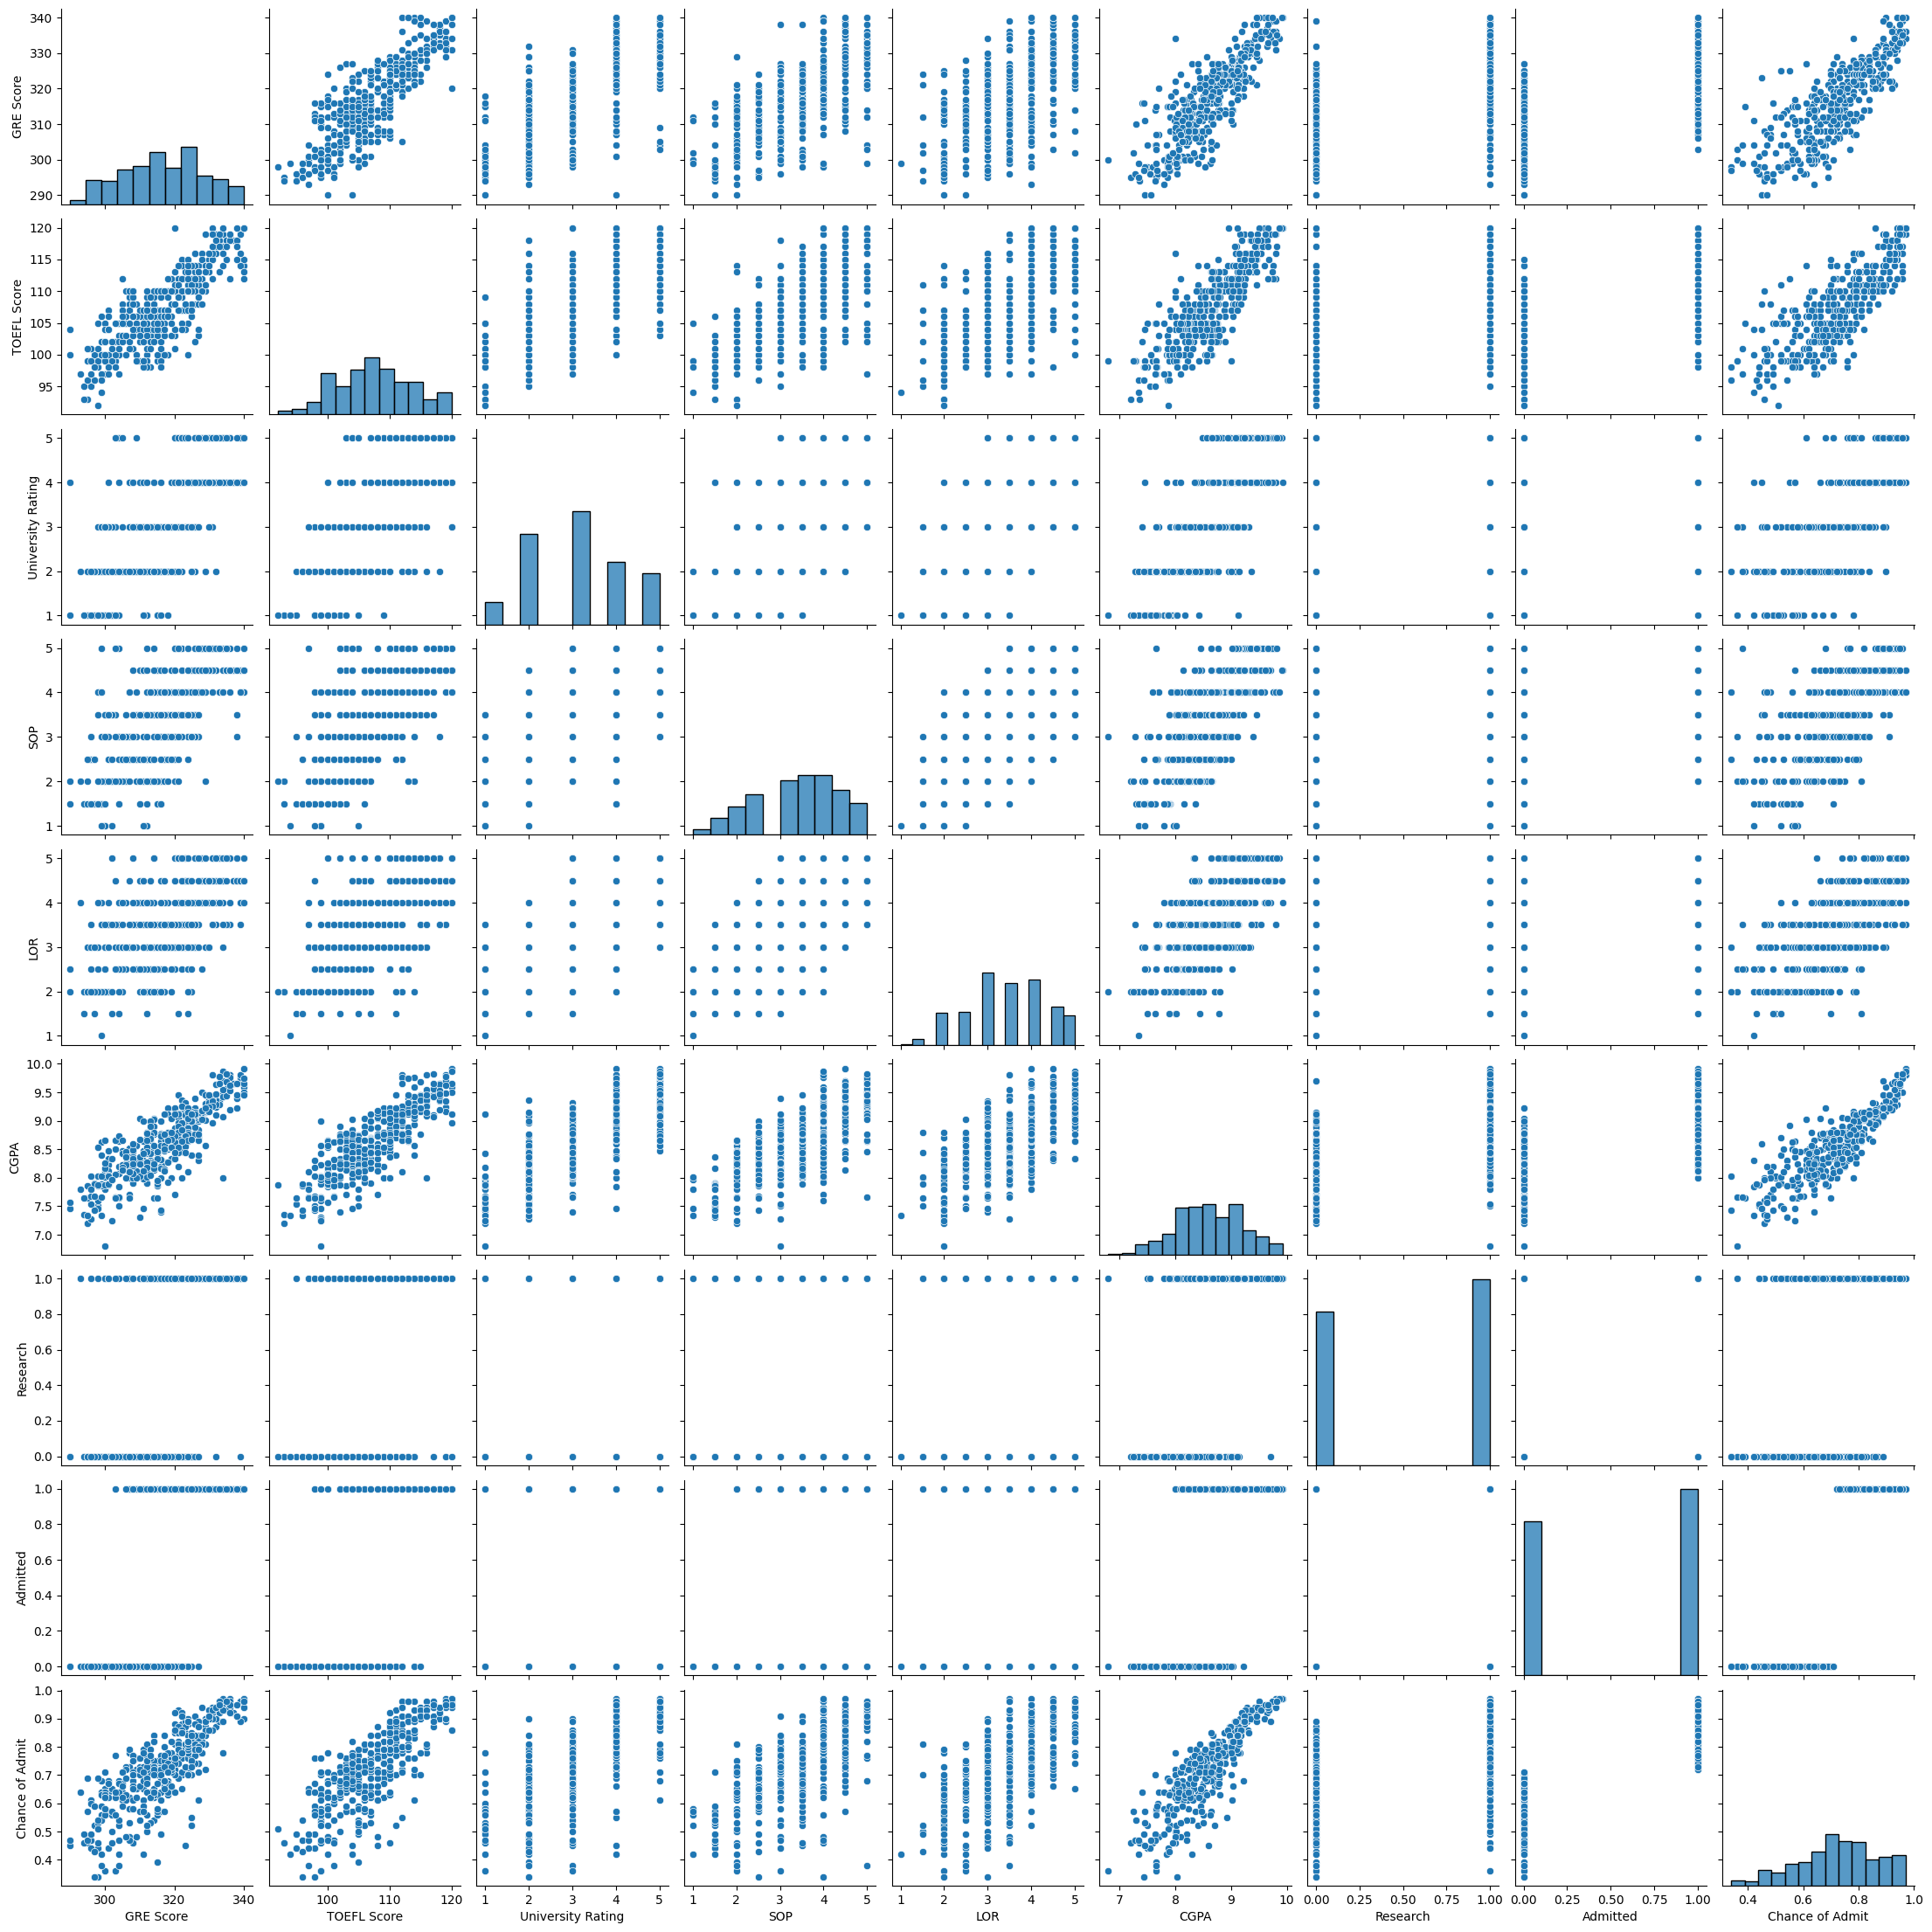

In [97]:
cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Admitted','Chance of Admit']
sns.pairplot(data[cols])
plt.show()

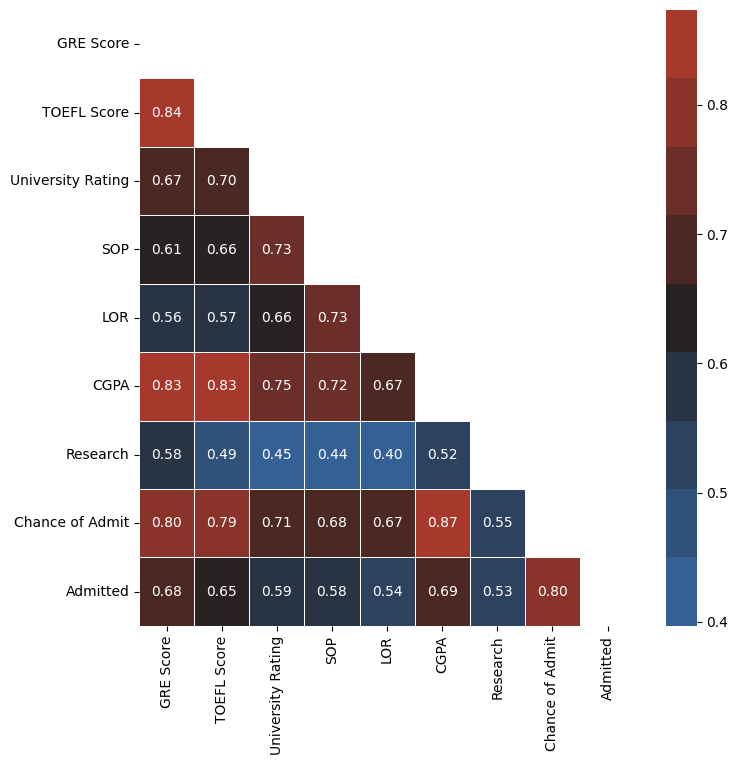

In [222]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark")
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [99]:
AdmittedCol=data['Admitted']

In [100]:
def counts(elements):
    classes = {}
    for element in elements:
        if element in classes:
            classes[element] += 1
        else:
            classes[element] = 1
    return [classes[e] for e in classes]
counts(AdmittedCol)

[219, 181]

In [101]:
def gini(elements):
    cts = counts(elements)
    n = sum(cts)
    return 1 - sum([p_i**2/n**2 for p_i in cts])
gini(AdmittedCol)

0.49548749999999997

In [102]:
def entropy(elements):
    if len(elements)==0:
        return 0
    cts = counts(elements)
    n = sum(cts)
    props = 1/n*np.array(cts)
    return -np.dot(np.log2(props), props)
entropy(AdmittedCol)

0.9934800107379318

## Use Decision Tree for Classification : The labels wil be 'Admitted' column cause its a categorical column

In [225]:
from sklearn.model_selection import train_test_split

features = data.drop(['Admitted','Chance of Admit'], axis=1)
labels = data['Admitted']

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.02, random_state=100)

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(392, 7)
(8, 7)
(392,)
(8,)


In [227]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt =DecisionTreeClassifier()
dt.fit(features_train, labels_train)

DecisionTreeClassifier()

## Calculate the Classification Model Accuracy :

In [228]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predict the labels for the test set
predict_dt = dt.predict(features_test)

## The Dataset (True:219,False:181) :
print("The Dataset (True:219,False:181) Entropy: ",entropy(AdmittedCol))
print("The Dataset (True:219,False:181) Gini: ",gini(AdmittedCol))

# Calculate the Accuracy
print("DecisionTreeClassifierTrainScore: ",dt.score(features_train, labels_train))
print("DecisionTreeClassifierTestScore : ",dt.score(features_test, labels_test))

# Calculate the confusion matrix
print("Confusion Matrix : \n",confusion_matrix(labels_test, predict_dt))

# Calculate accuracy, precision, recall, and F1 score
print("\nAccuracy: ", accuracy_score(labels_test, predict_dt))
print("Precision : ", precision_score(labels_test, predict_dt, average='weighted'))
print("Recall    : ", recall_score(labels_test, predict_dt, average='weighted'))
print("F1 Score  : ", f1_score(labels_test, predict_dt, average='weighted'))

# Calculate ROC AUC score
print("ROC AUC Score:", roc_auc_score(labels_test, predict_dt))

# Calculate classification report
print("\nClassification Report: \n",classification_report(labels_test, predict_dt))

The Dataset (True:219,False:181) Entropy:  0.9934800107379318
The Dataset (True:219,False:181) Gini:  0.49548749999999997
DecisionTreeClassifierTrainScore:  1.0
DecisionTreeClassifierTestScore :  0.75
Confusion Matrix : 
 [[1 0]
 [2 5]]

Accuracy:  0.75
Precision :  0.9166666666666666
Recall    :  0.75
F1 Score  :  0.7916666666666667
ROC AUC Score: 0.8571428571428572

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.71      0.83         7

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



## Draw The Decision Tree

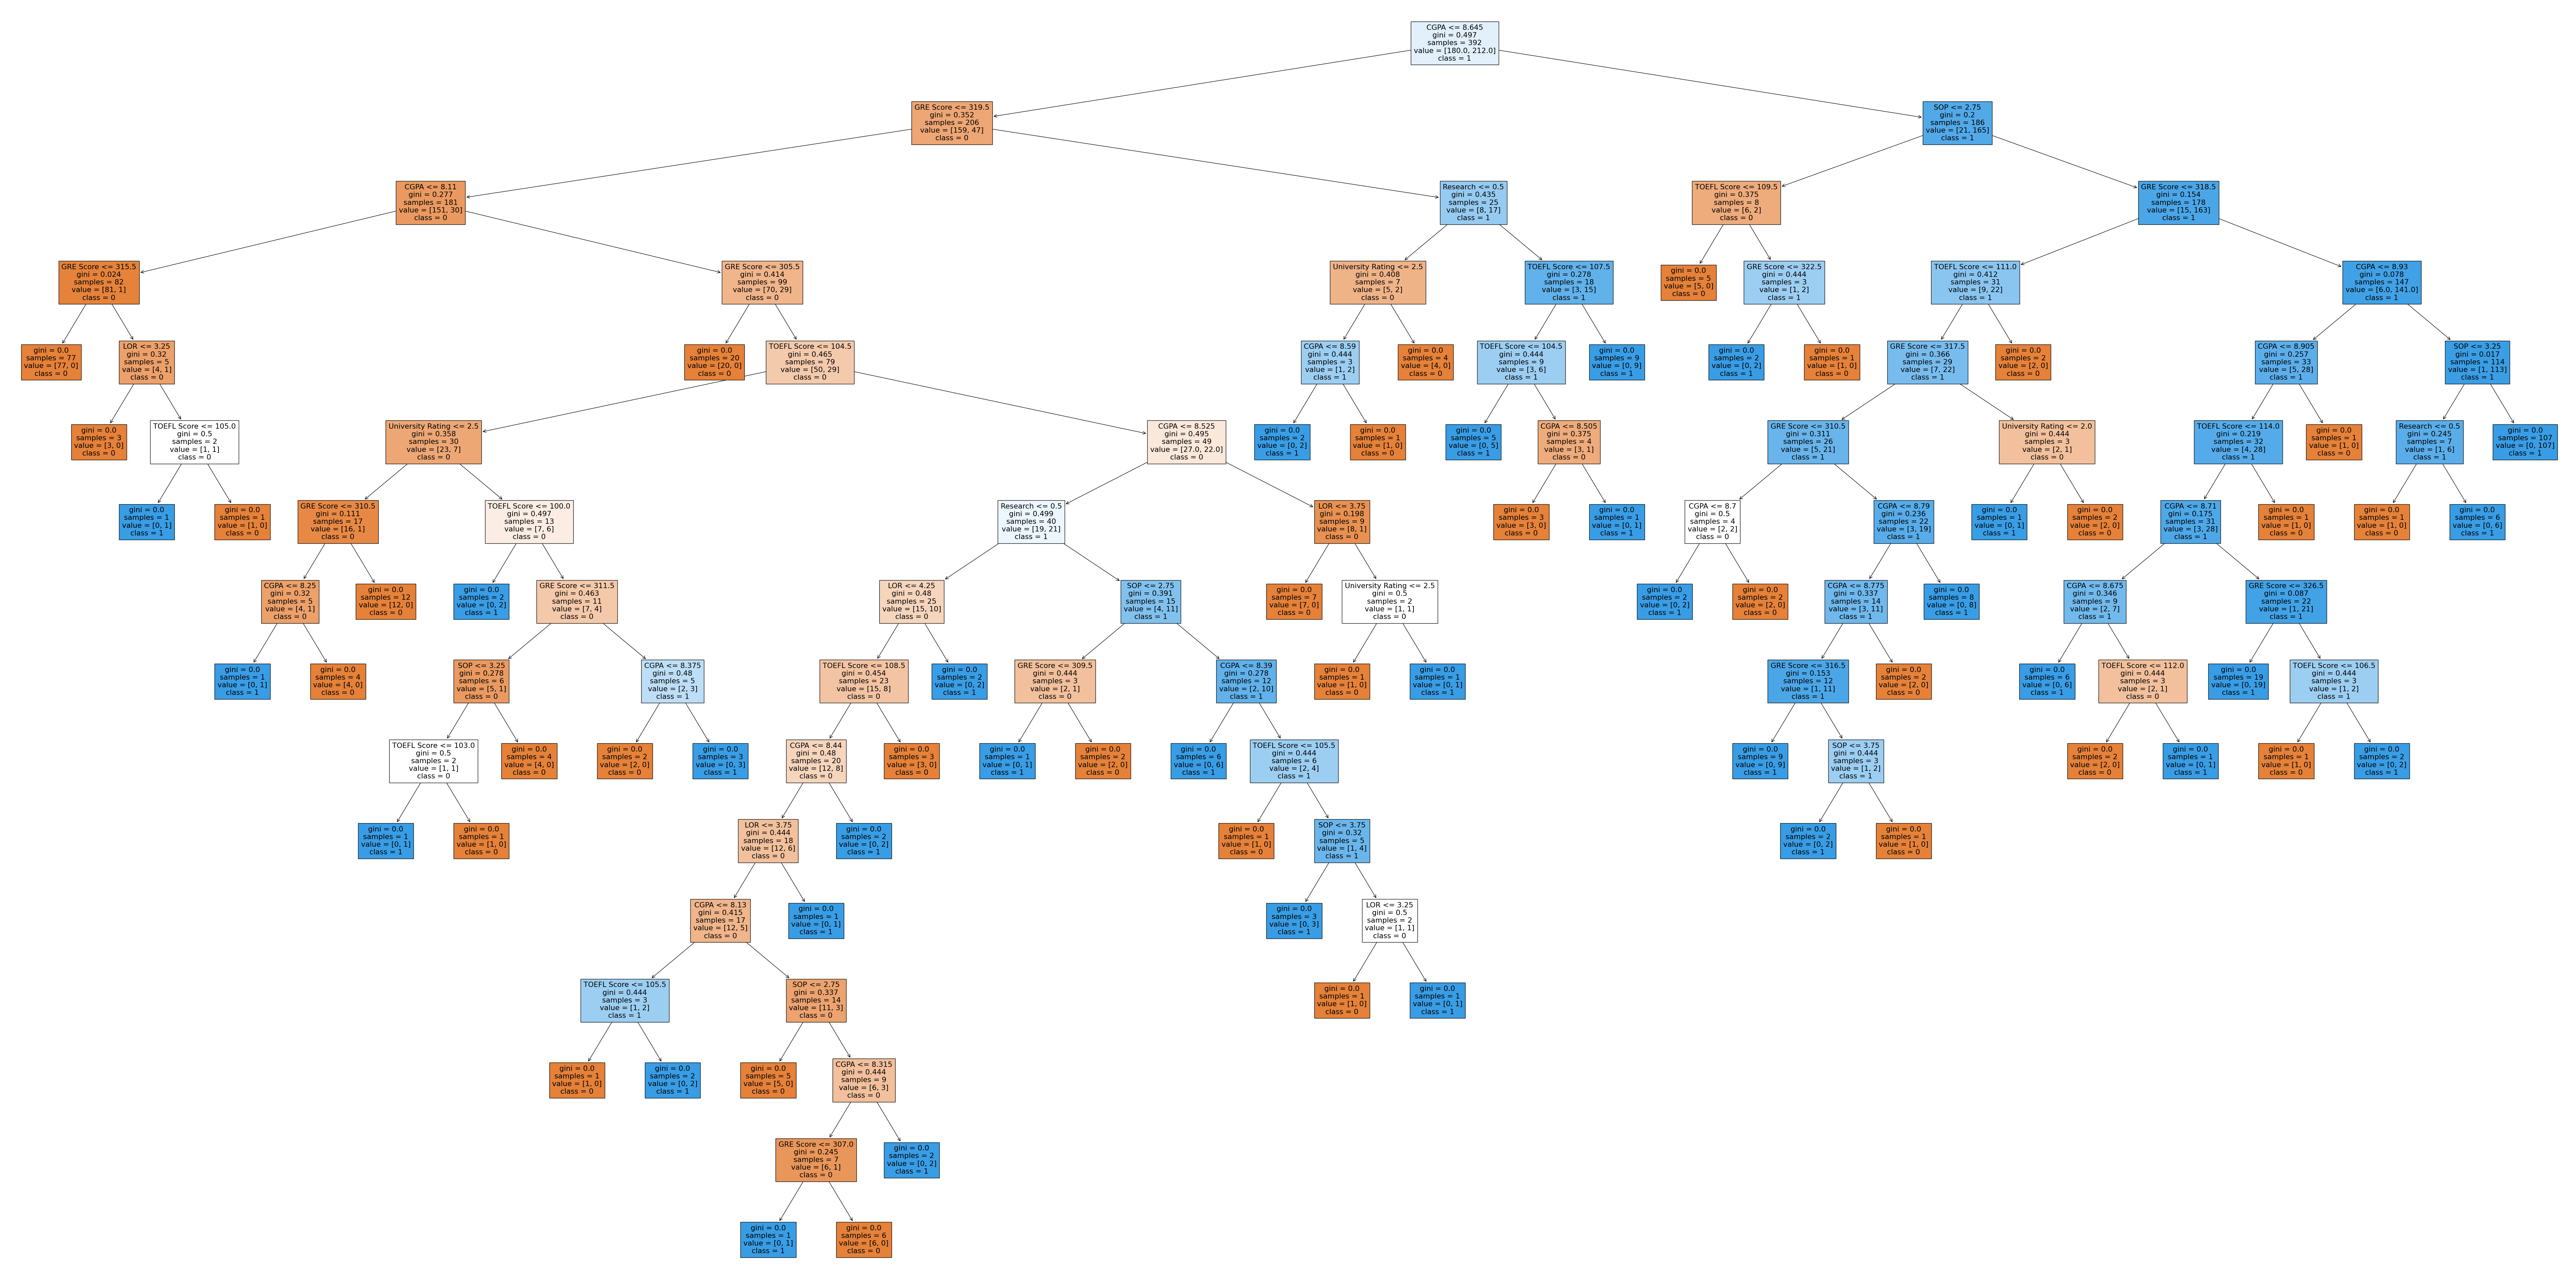

In [184]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_tre(X, y, model, size_of_points=50):
    plt.figure(figsize=(100, 50))
    plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(c) for c in model.classes_])
    plt.show()

plot_tre(features_train, labels_train, dt, size_of_points=100)

In [107]:
# Train a Decision Tree Classifier with 3 levels only
dt_1 =DecisionTreeClassifier(max_depth=3,)
dt_1.fit(features_train, labels_train)

DecisionTreeClassifier(max_depth=3)

In [108]:
# Predict the labels for the test set
predict_dt_1 = dt_1.predict(features_test)

# Calculate the Accuracy
print("DecisionTreeClassifierTrainScore 1: ",dt_1.score(features_train, labels_train))
print("DecisionTreeClassifierTestScore 1 : ",dt_1.score(features_test, labels_test))

# Calculate the confusion matrix
print("Confusion Matrix : \n",confusion_matrix(labels_test, predict_dt_1))

# Calculate accuracy, precision, recall, and F1 score
print("\nAccuracy: ", accuracy_score(labels_test, predict_dt_1))
print("Precision : ", precision_score(labels_test, predict_dt_1, average='weighted'))
print("Recall    : ", recall_score(labels_test, predict_dt_1, average='weighted'))
print("F1 Score  : ", f1_score(labels_test, predict_dt_1, average='weighted'))

# Calculate ROC AUC score
print("ROC AUC Score:", roc_auc_score(labels_test, predict_dt_1))

# Calculate classification report
print("\nClassification Report: \n",classification_report(labels_test, predict_dt_1))

DecisionTreeClassifierTrainScore 1:  0.865
DecisionTreeClassifierTestScore 1 :  0.78
Confusion Matrix : 
 [[61 29]
 [15 95]]

Accuracy:  0.78
Precision :  0.7825551782682513
Recall    :  0.78
F1 Score  :  0.7773040881474617
ROC AUC Score: 0.7707070707070708

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73        90
           1       0.77      0.86      0.81       110

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200



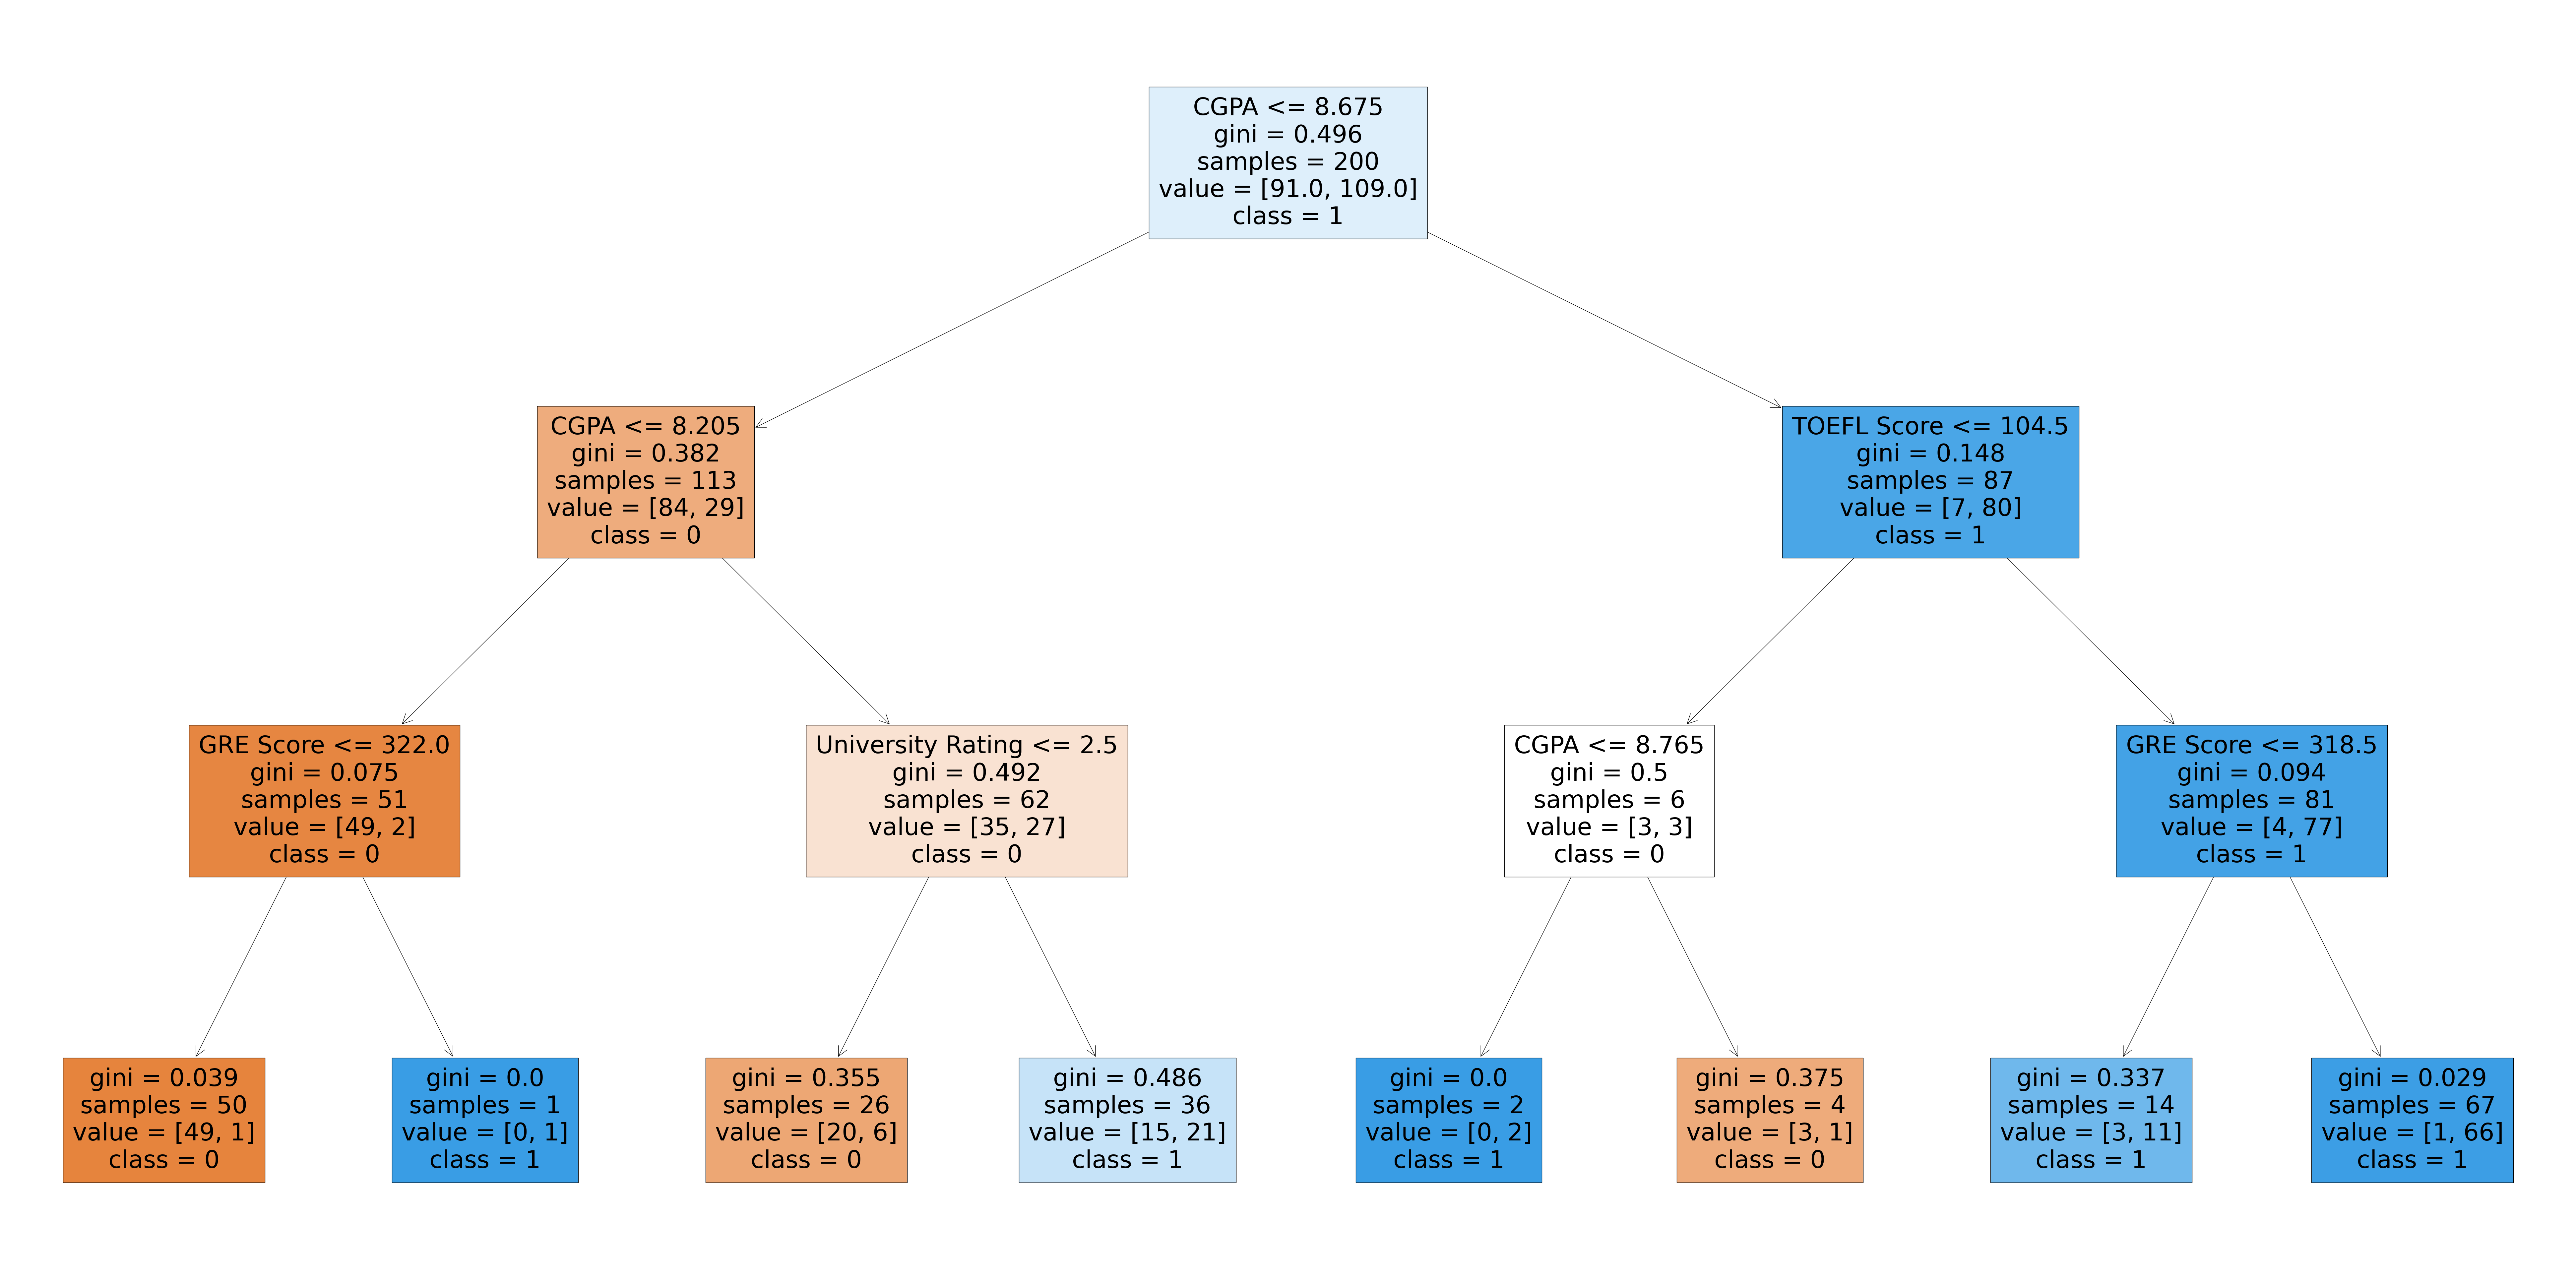

In [185]:
plot_tre(features_train, labels_train, dt_1, size_of_points=50)

## Use Decision Tree for Classification : With 2 features ['GRE Score','TOEFL Score'] only 

In [205]:
features_2D = data.drop(['Admitted','Chance of Admit','University Rating','SOP','LOR','CGPA','Research'], axis=1)
labels_2D = data['Admitted']

features_train2, features_test2, labels_train2, labels_test2 = train_test_split(
    features_2D, labels_2D, test_size=0.02, random_state=100)

print(features_train2.shape)
print(features_test2.shape)
print(labels_train2.shape)
print(labels_test2.shape)

(392, 2)
(8, 2)
(392,)
(8,)


In [196]:
# Train a Decision Tree Classifier with 2 features only
dt_2D =DecisionTreeClassifier(max_depth=3)
dt_2D.fit(features_train2, labels_train2)

DecisionTreeClassifier(max_depth=3)

In [172]:
# Predict the labels for the test set
predict_dt_2D = dt_2D.predict(features_test2)

# Calculate the Accuracy
print("DecisionTreeClassifierTrainScore 1: ",dt_2D.score(features_train2, labels_train2))
print("DecisionTreeClassifierTestScore 1 : ",dt_2D.score(features_test2, labels_test2))

# Calculate the confusion matrix
print("Confusion Matrix : \n",confusion_matrix(labels_test2, predict_dt_2D))

# Calculate accuracy, precision, recall, and F1 score
print("\nAccuracy: ", accuracy_score(labels_test2, predict_dt_2D))
print("Precision : ", precision_score(labels_test2, predict_dt_2D, average='weighted'))
print("Recall    : ", recall_score(labels_test2, predict_dt_2D, average='weighted'))
print("F1 Score  : ", f1_score(labels_test2, predict_dt_2D, average='weighted'))

# Calculate ROC AUC score
print("ROC AUC Score:", roc_auc_score(labels_test2, predict_dt_2D))

# Calculate classification report
print("\nClassification Report: \n",classification_report(labels_test2, predict_dt_2D))

DecisionTreeClassifierTrainScore 1:  0.8239795918367347
DecisionTreeClassifierTestScore 1 :  0.75
Confusion Matrix : 
 [[1 0]
 [2 5]]

Accuracy:  0.75
Precision :  0.9166666666666666
Recall    :  0.75
F1 Score  :  0.7916666666666667
ROC AUC Score: 0.8571428571428572

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.71      0.83         7

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



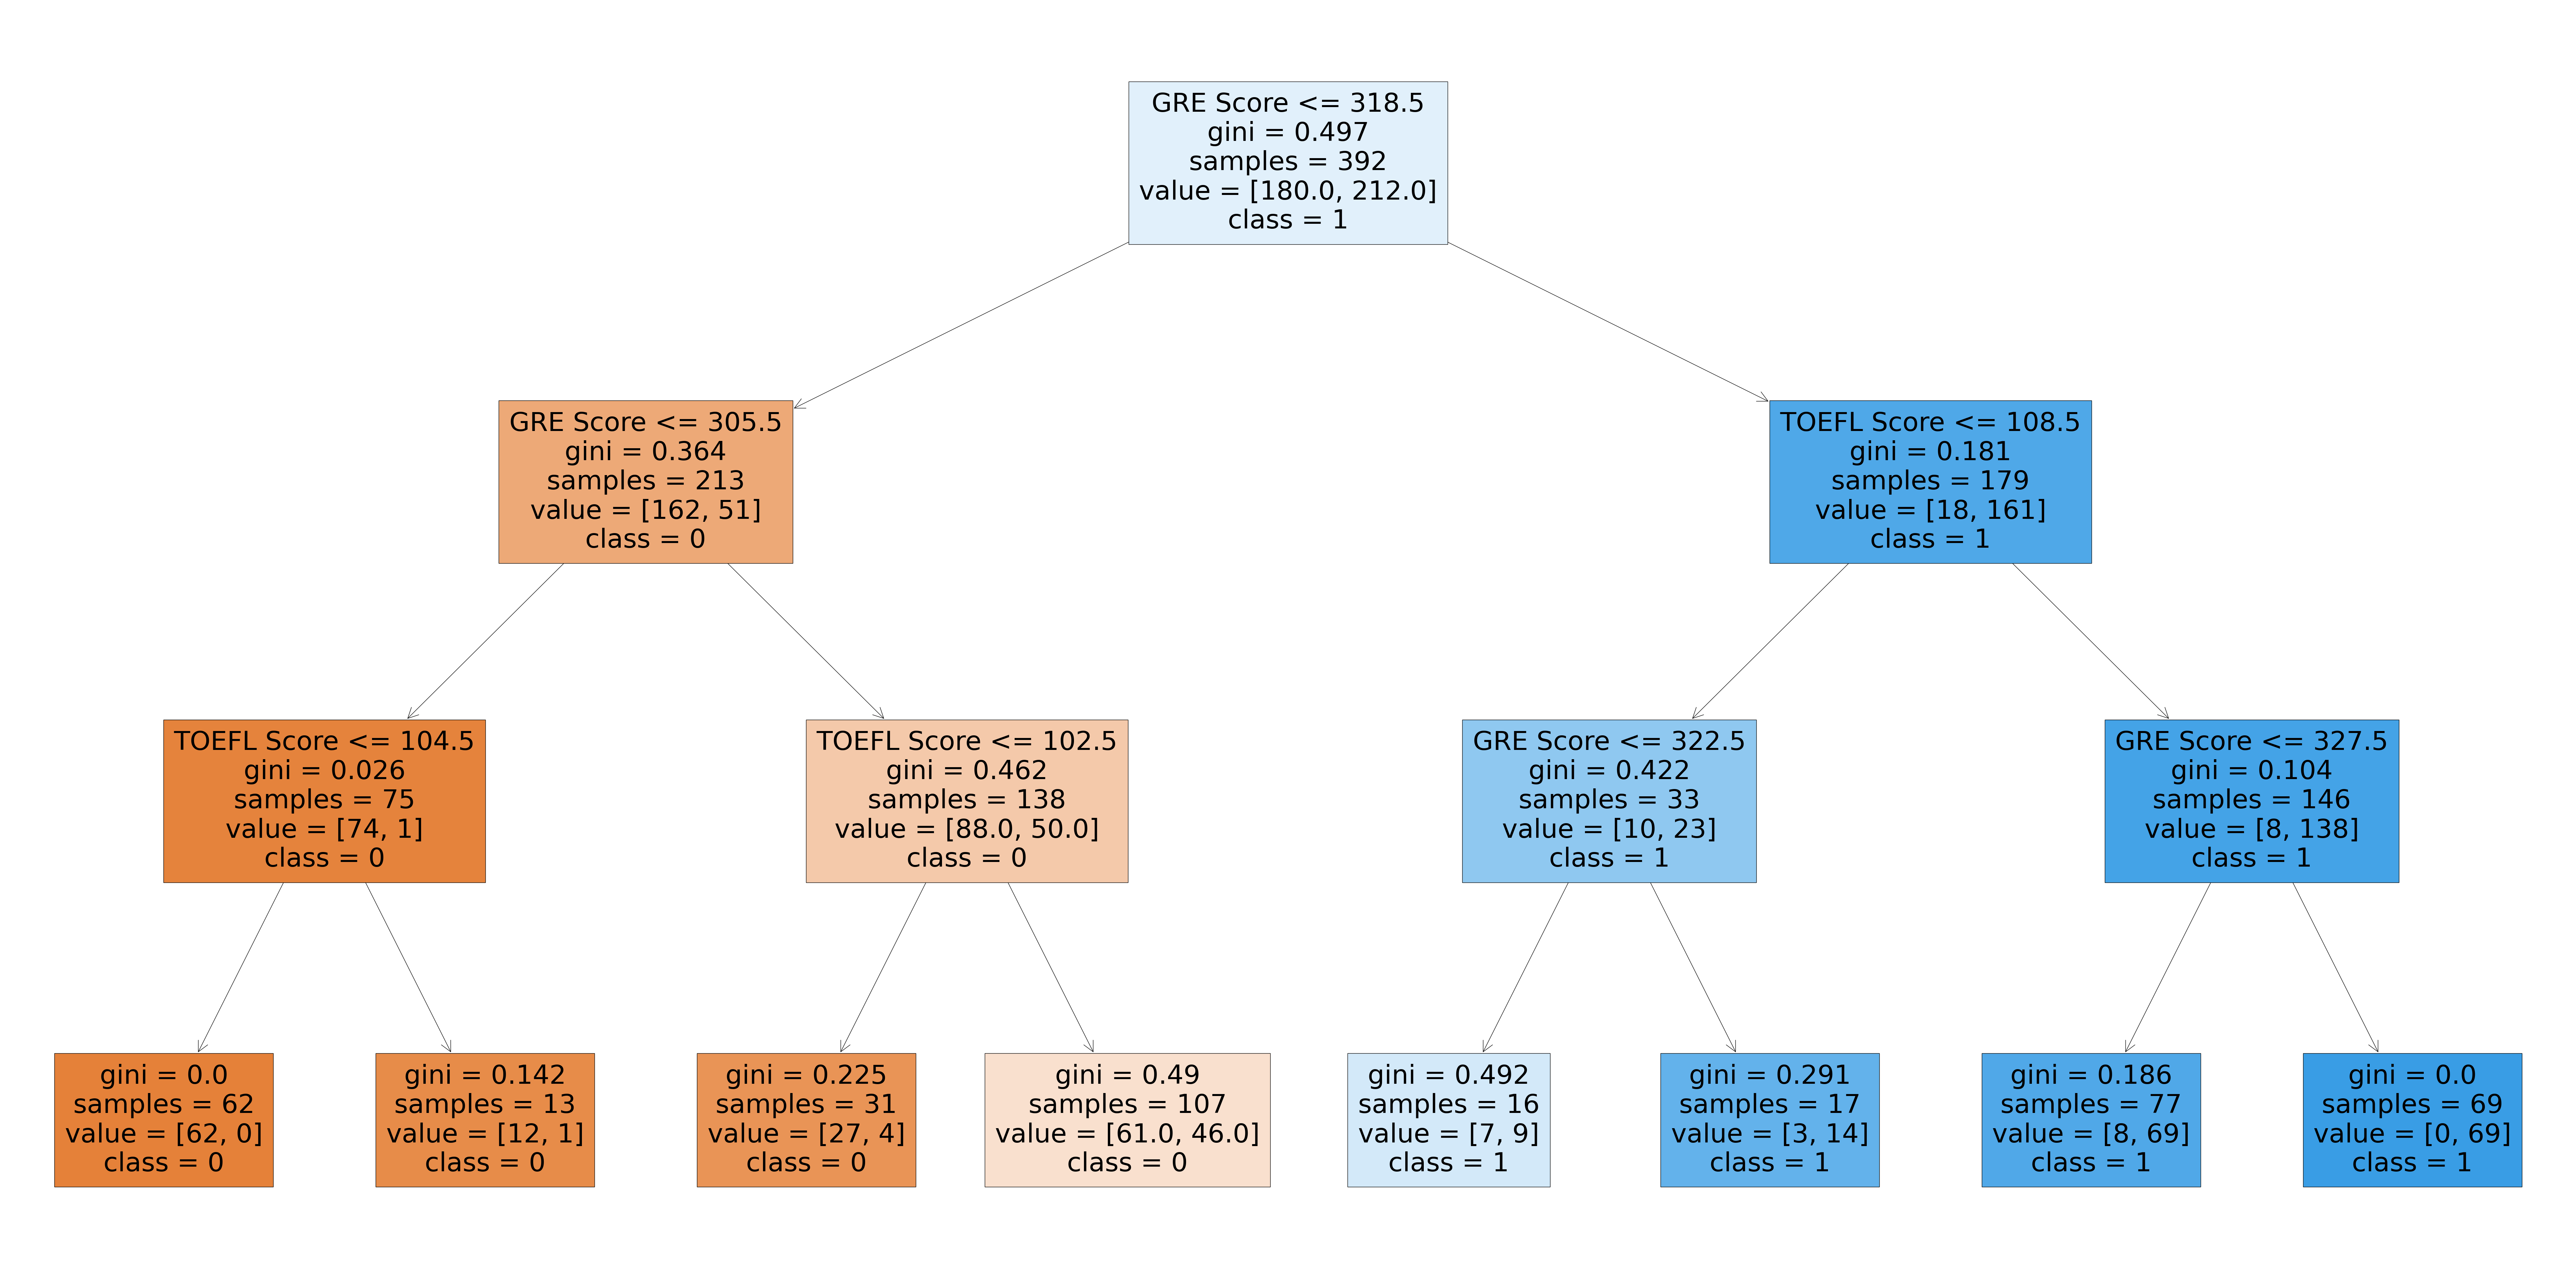

In [187]:
plot_tre(features_train2, labels_train2,dt_2D, size_of_points=20)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


c:\Users\esraa_000\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


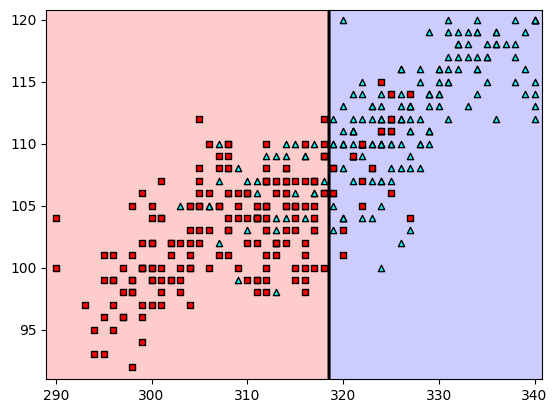

In [197]:
import numpy as np
from matplotlib import pyplot

def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y == 1)]
    ham = X[np.argwhere(y == 0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s=size_of_points,
                   color='cyan',
                   edgecolor='k',
                   marker='^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s=size_of_points,
                   color='red',
                   edgecolor='k',
                   marker='s')
def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)
    pyplot.contourf(xx, yy, Z, colors=[
                    'red', 'blue'], alpha=0.2, levels=range(-1, 2))
    pyplot.contour(xx, yy, Z, colors='k', linewidths=1)
    plot_points(X, y, size_of_points)
    pyplot.show()
plot_model(features_train2, labels_train2,dt_2D, size_of_points=20)

## Use Decision Tree for Regression : This time the labels wil be 'Chance of Admit' column cause its a numerical column

In [198]:
from sklearn.model_selection import train_test_split

features_r = data.drop(['Admitted','Chance of Admit'], axis=1)
labels_r = data['Chance of Admit']

features_trainr, features_testr, labels_trainr, labels_testr = train_test_split(
    features_r, labels_r, test_size=0.02, random_state=100)

print(features_trainr.shape)
print(features_testr.shape)
print(labels_trainr.shape)
print(labels_testr.shape)

(392, 7)
(8, 7)
(392,)
(8,)


In [213]:
from sklearn.tree import DecisionTreeRegressor
# use Decision Tree for Regression to fit tha data
dt_regressor = DecisionTreeRegressor()#max_depth=11)
dt_regressor.fit(features_trainr, labels_trainr)

DecisionTreeRegressor()

## Calculate the Regression Model Accuracy :

In [214]:
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

# Predict the labels for the test set
predict_dt_regressor = dt_regressor.predict(features_testr)

# Calculate the Accuracy
print("DecisionTreeRegressorTrainScore :",dt_regressor.score(features_trainr, labels_trainr))
print("DecisionTreeRegressorTestScore  :",dt_regressor.score(features_testr, labels_testr))


# Explained Variance Score
print("Explained Variance Score        :", explained_variance_score(labels_testr, predict_dt_regressor))

# Max Error
print("Max Error                       :", max_error(labels_testr, predict_dt_regressor))

# Mean Squared Error
print("Mean Squared Error              :", mean_squared_error(labels_testr, predict_dt_regressor))

# Mean Squared Logarithmic Error
print("Mean Squared Logarithmic Error  :", mean_squared_log_error(labels_testr, predict_dt_regressor))

# Median Absolute Error
print("Median Absolute Error           :", median_absolute_error(labels_testr, predict_dt_regressor))

# R-squared (Coefficient of Determination) Regression Score
print("R-squared (Coefficient of Determination) Regression Score:", r2_score(labels_testr, predict_dt_regressor))


DecisionTreeRegressorTrainScore : 1.0
DecisionTreeRegressorTestScore  : 0.4564709118415624
Explained Variance Score        : 0.47022417824233265
Max Error                       : 0.14
Mean Squared Error              : 0.0061750000000000025
Mean Squared Logarithmic Error  : 0.002128384508209587
Median Absolute Error           : 0.02999999999999997
R-squared (Coefficient of Determination) Regression Score: 0.4564709118415624


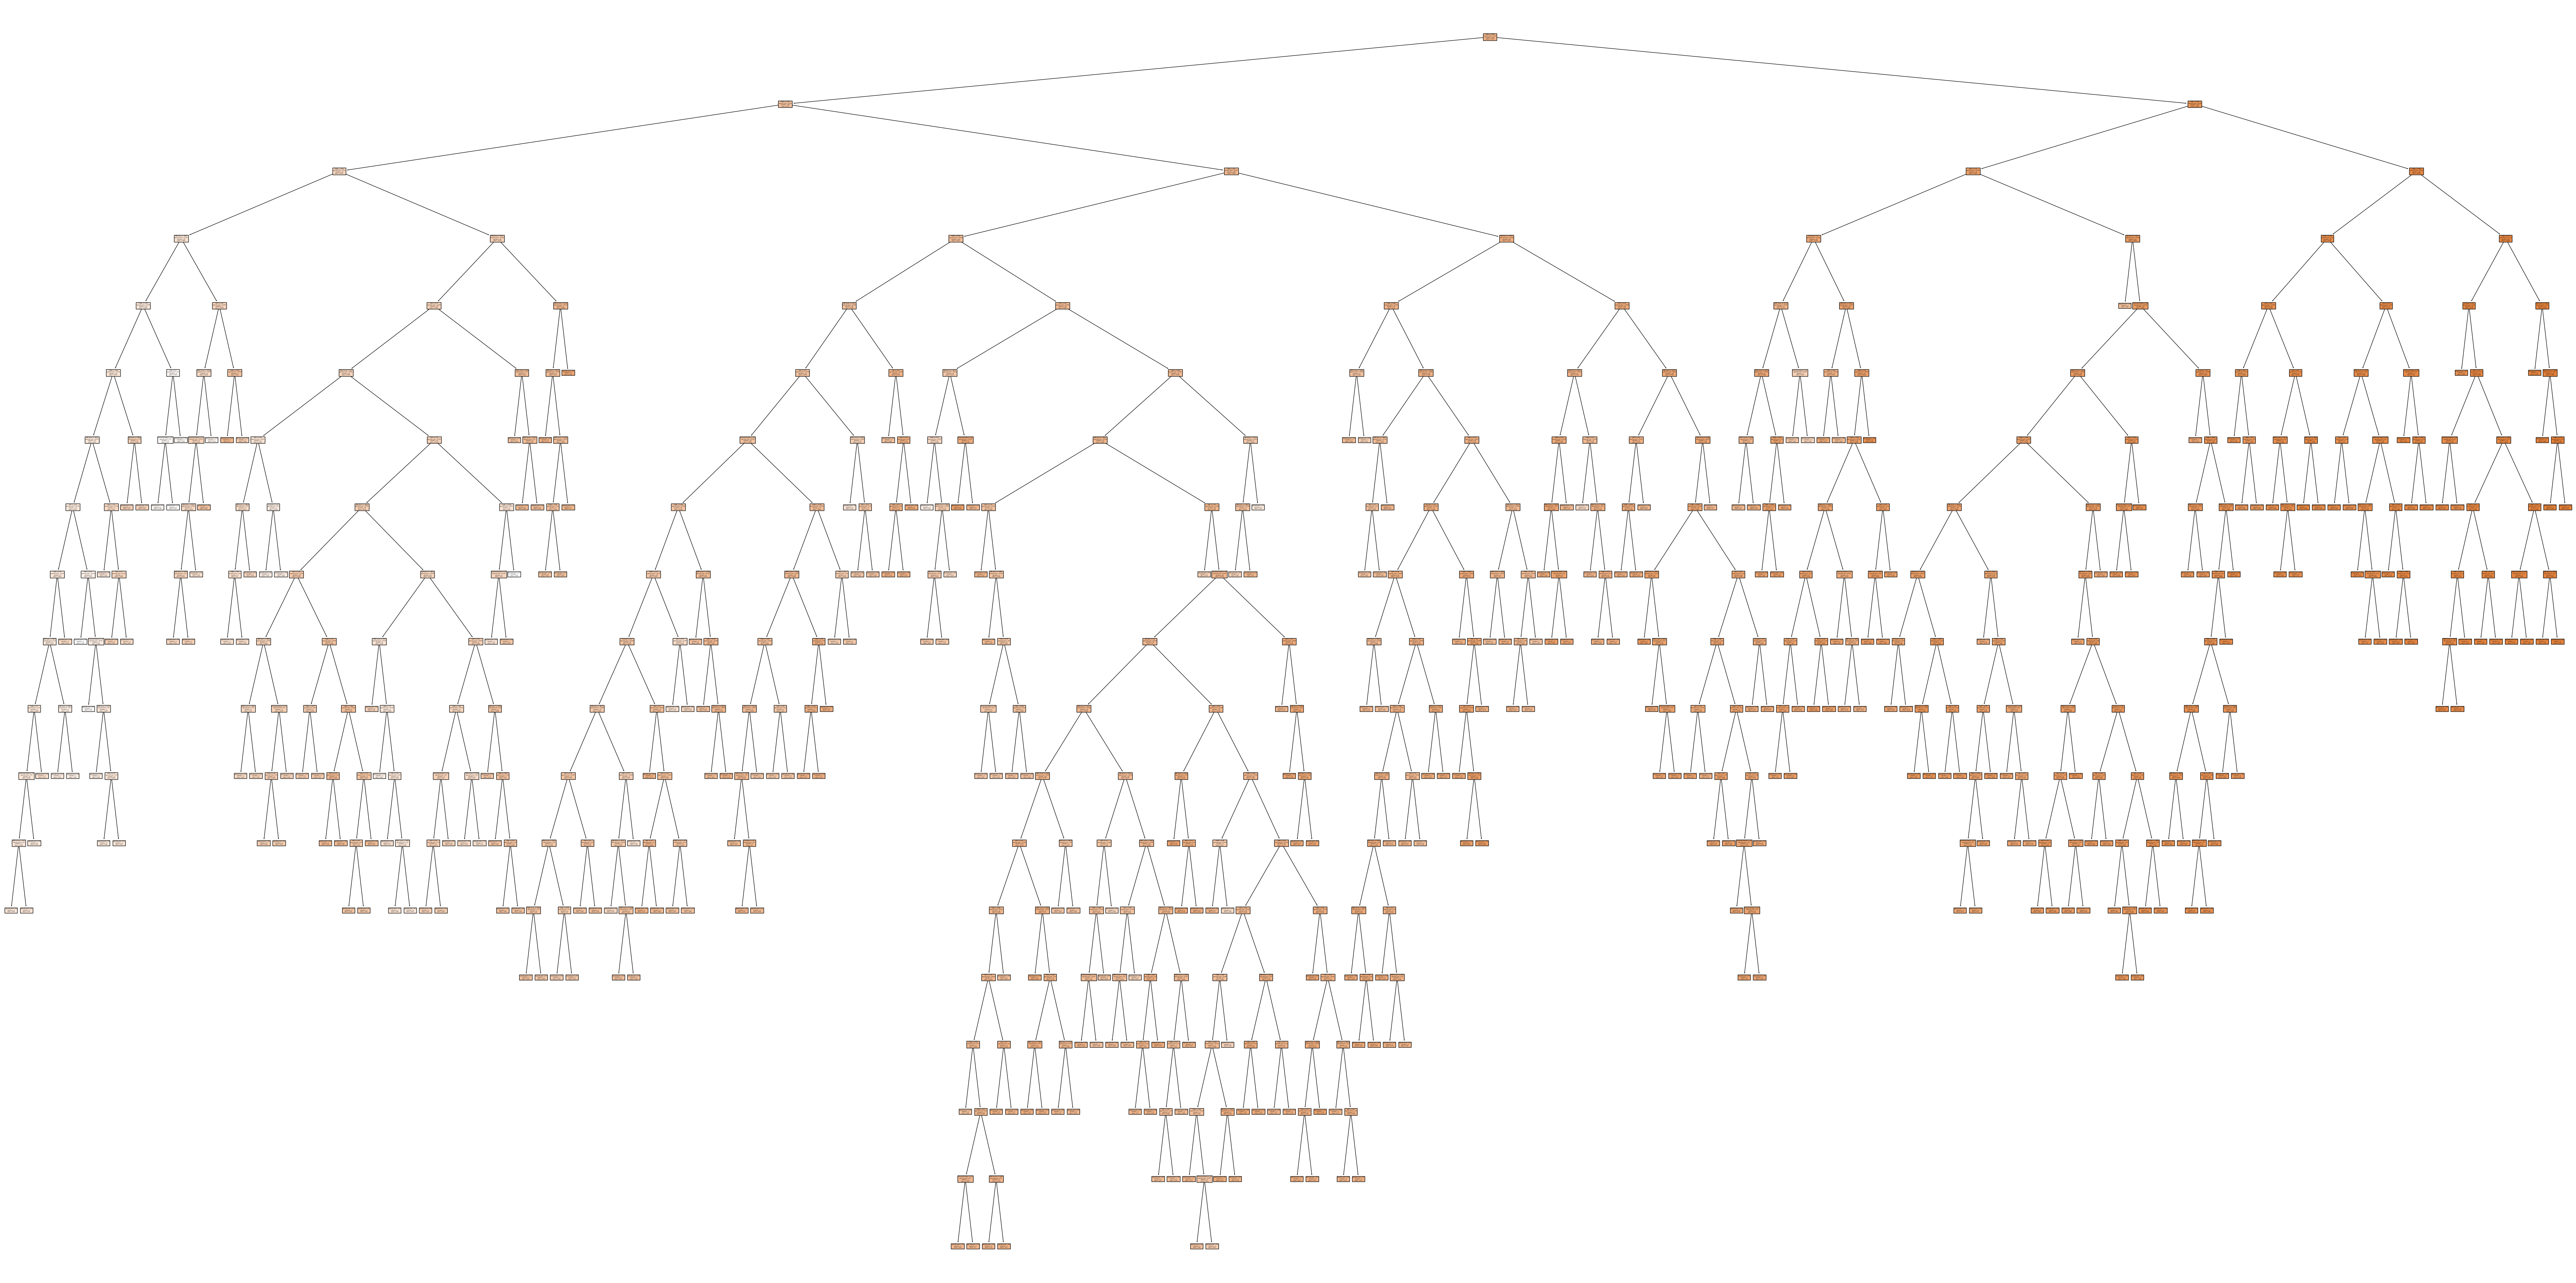

In [215]:
plt.figure(figsize=(100,50))
plot_tree(dt_regressor, filled=True, feature_names=features_train.columns)
plt.show()

In [219]:
# use Decision Tree for Regression with 3 levels only
dt_regressor_1 = DecisionTreeRegressor(max_depth=3)
dt_regressor_1.fit(features_trainr, labels_trainr)

DecisionTreeRegressor(max_depth=3)

In [220]:
# Predict the labels for the test set
predict_dt_regressor_1 = dt_regressor_1.predict(features_testr)

# Calculate the Accuracy
print("DecisionTreeRegressorTrainScore :",dt_regressor_1.score(features_trainr, labels_trainr))
print("DecisionTreeRegressorTestScore  :",dt_regressor_1.score(features_testr, labels_testr))


# Explained Variance Score
print("Explained Variance Score        :", explained_variance_score(labels_testr, predict_dt_regressor_1))

# Max Error
print("Max Error                       :", max_error(labels_testr, predict_dt_regressor_1))

# Mean Squared Error
print("Mean Squared Error              :", mean_squared_error(labels_testr, predict_dt_regressor_1))

# Mean Squared Logarithmic Error
print("Mean Squared Logarithmic Error  :", mean_squared_log_error(labels_testr, predict_dt_regressor_1))

# Median Absolute Error
print("Median Absolute Error           :", median_absolute_error(labels_testr, predict_dt_regressor_1))

# R-squared (Coefficient of Determination) Regression Score
print("R-squared (Coefficient of Determination) Regression Score:", r2_score(labels_testr, predict_dt_regressor_1))


DecisionTreeRegressorTrainScore : 0.7754378322859874
DecisionTreeRegressorTestScore  : 0.7502347381048197
Explained Variance Score        : 0.7553678094236034
Max Error                       : 0.10175999999999996
Mean Squared Error              : 0.0028375675300622762
Mean Squared Logarithmic Error  : 0.0009838330151064284
Median Absolute Error           : 0.03946482758620701
R-squared (Coefficient of Determination) Regression Score: 0.7502347381048197


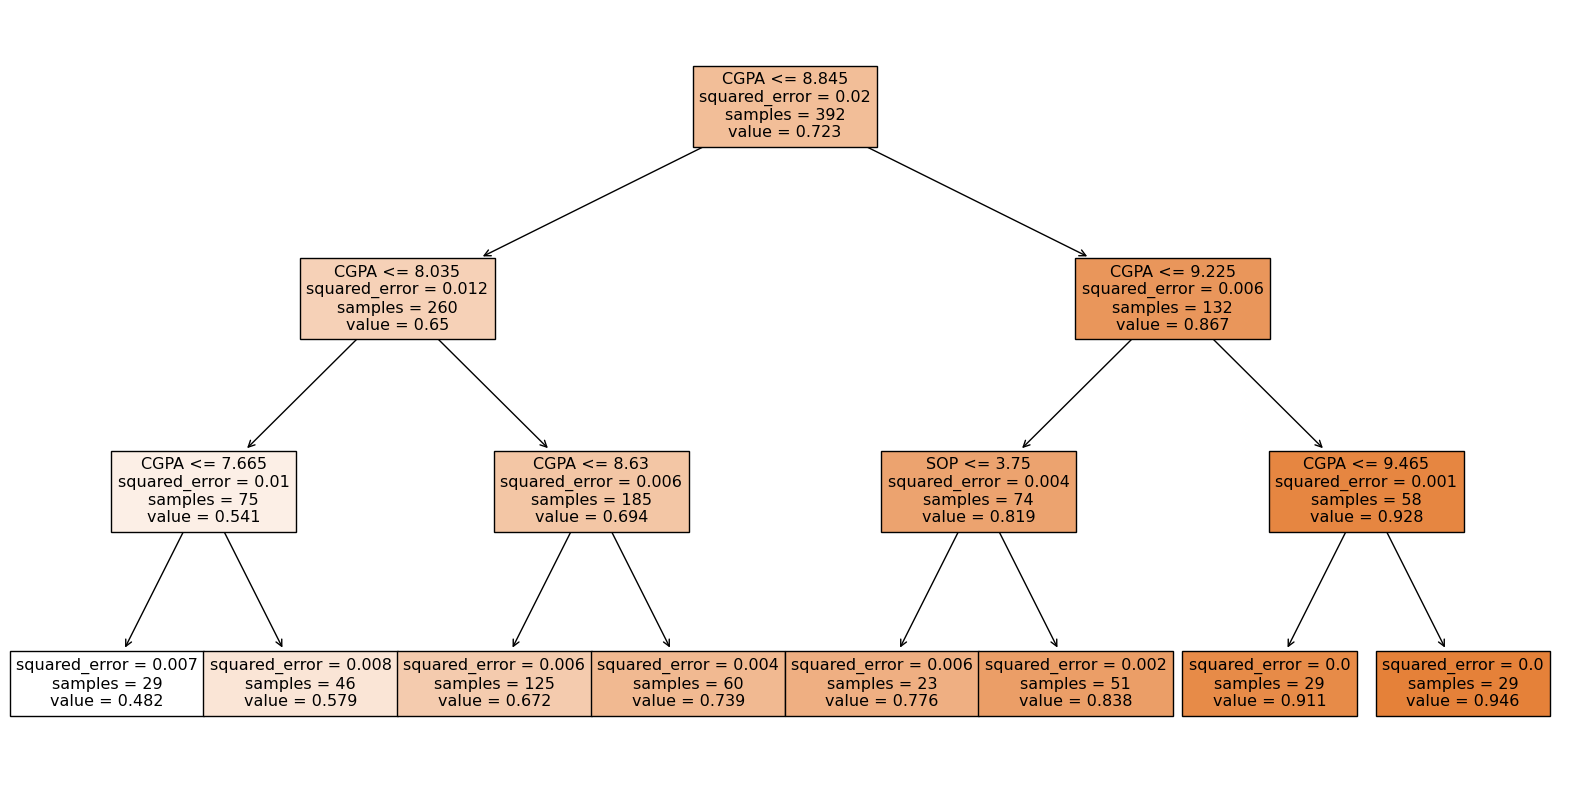

In [221]:
plt.figure(figsize=(20,10))
plot_tree(dt_regressor_1, filled=True, feature_names=features_train.columns)
plt.show()

## Decision Tree model is not good for this dataset, there is always overfitting or underfitting.